# Polynomial regression

In [1]:
#Please run this first
import sys
import numpy as np

from datascience import *
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# Got the datapoints from
# https://johnstonmd.wordpress.com/teaching/math-178-spring-2017/
x = np.array([16, 17, 23, 25, 28, 31, 40, 48, 54, 67]).reshape((-1, 1))
y = np.array([180, 163, 172, 168, 165, 156, 153, 144, 139, 130])
print(x)
print(y)

[[16]
 [17]
 [23]
 [25]
 [28]
 [31]
 [40]
 [48]
 [54]
 [67]]
[180 163 172 168 165 156 153 144 139 130]


### Numpy calculate regression with a two dimensional array x.
### For our table we map the two dimensional array to a one dimentional array.

In [3]:
x_one_dimensional = [_[0] for _ in x]
x_one_dimensional

[16, 17, 23, 25, 28, 31, 40, 48, 54, 67]

In [4]:
table = Table().with_columns(
    'Age', x_one_dimensional,
    'Heart rate', y
)
table

Age,Heart rate
16,180
17,163
23,172
25,168
28,165
31,156
40,153
48,144
54,139
67,130


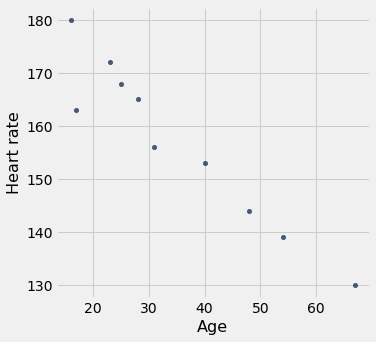

In [5]:
table.scatter('Age')

In [6]:
def polynomial_regression(x, y, degree_my = 1):
  """
  Return R^2, coefficients and the interception
  
  polynomial_regression(x, y, degree_my = 1) -> (r_sq, coefficients, interception)

  Parameters
  ----------
  x: np.array, regressors
  y: np.array, predictors
  degree: int, optional, default 1, the degree of the model function
  
  Examples
  --------
  >>> x = np.array([16, 17, 23, 25, 28, 31, 40, 48, 54, 67]).reshape((-1, 1))
  >>> y = np.array([180, 163, 172, 168, 165, 156, 153, 144, 139, 130])

  >>> x
  array([[16],
         [17],
         [23],
         [25],
         [28],
         [31],
         [40],
         [48],
         [54],
         [67]])
  >>> y
  array([180, 163, 172, 168, 165, 156, 153, 144, 139, 130])
  >>> polynomial_regression(x, y)
  (0.9141779810921304, array([-0.88693692]), 187.95409848808737)
  >>> polynomial_regression(x, y, 2)
  (0.9147602910606555, array([-1.01045344,  0.00153909]), 189.99421074646295)
  >>> polynomial_regression(x, y, 5)
  (0.9184131002053144, array([ 7.73620330e+00, -4.45581354e-01,  1.08361046e-02, -1.26584517e-04,
          5.75609467e-07]), 126.4417938766303)
  >>> 
  """
  transformer = PolynomialFeatures(degree = degree_my, include_bias = False)
  transformer.fit(x)
  x_ = transformer.transform(x)

  model = LinearRegression().fit(x_, y)
  
  coefficient_of_determination = model.score(x_, y)
  interception = model.intercept_
  coefficients = model.coef_

  return (coefficient_of_determination, coefficients, interception)

def linear_regression(x, y):
  """
  Returns R^2, slope and interception
  """
  # Reusing the existing 'general' polynomial_regression function
  return polynomial_regression(x, y, 1) 

linear_regression(x, y)

(0.9141779810921304, array([-0.88693692]), 187.95409848808737)

In [7]:
r_sq, coefficients, interception = linear_regression(x, y)
print('R^2: ', r_sq)
print('coefficients: ', coefficients)
print('intersection: ', interception)

R^2:  0.9141779810921304
coefficients:  [-0.88693692]
intersection:  187.95409848808737


In [8]:
prediction_function = lambda age: coefficients[0] * age + interception
print(prediction_function)
age = 31
print('your predicted HR is %d' % prediction_function(age))

<function <lambda> at 0x1a18204598>
your predicted HR is 160


In [9]:
prediction_array = prediction_function(table.column('Age'))
prediction_array

array([173.76310778, 172.87617086, 167.55454934, 165.7806755 ,
       163.11986474, 160.45905399, 152.47662171, 145.38112636,
       140.05950484, 128.52932489])

In [10]:
# Shows only the first five elements in the array
prediction_array[:5]

array([173.76310778, 172.87617086, 167.55454934, 165.7806755 ,
       163.11986474])

In [11]:
table = table.with_column(
    'Linear Prediction', prediction_array
)
table

Age,Heart rate,Linear Prediction
16,180,173.763
17,163,172.876
23,172,167.555
25,168,165.781
28,165,163.12
31,156,160.459
40,153,152.477
48,144,145.381
54,139,140.06
67,130,128.529


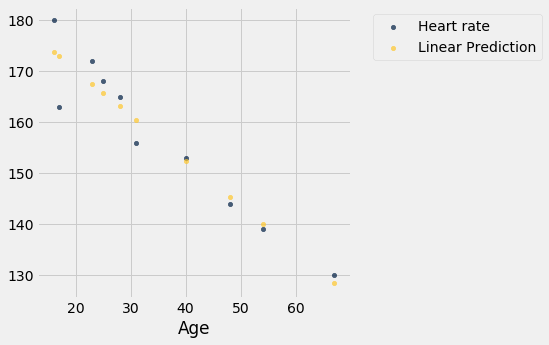

In [12]:
table.scatter(0)

In [13]:
slope = coefficients[0]
print('slope: ', slope)

print('The linear regression model is y = %.2f*x + %.2f' % (slope, interception))

age = int(input('what is your age: '))
print('your recomended HR is %d' % (prediction_function(age)))
print('this is %.2f percent accurate' %( r_sq * 100) )

slope:  -0.8869369194294376
The linear regression model is y = -0.89*x + 187.95
what is your age: 40
your recomended HR is 152
this is 91.42 percent accurate


In [14]:
def quadratic_regression(x, y):
  """
  Returning R^2, coefficients and the interceptions as a size three tupple.
  """
  return polynomial_regression(x, y, 2)

r_sq, coefficients, interception = quadratic_regression(x, y)
print('R^2: ', r_sq)
print('coefficients: ', coefficients)
print('intersection: ', interception)

R^2:  0.9147602910606555
coefficients:  [-1.01045344  0.00153909]
intersection:  189.99421074646295


In [15]:
prediction_function = \
  lambda age: sum( [coefficients[i] * age**(i + 1) for i in range(len(coefficients))] ) + interception
prediction_function

<function __main__.<lambda>(age)>

In [16]:
quadratic_prediction_array = prediction_function(table.column('Age'))
quadratic_prediction_array

array([174.22096186, 173.26129828, 167.5679584 , 165.69480382,
       162.90815825, 160.14921624, 152.03861155, 145.03850091,
       139.91770119, 129.2027895 ])

In [17]:
table = table.with_column(
    'Quadratic Prediction', quadratic_prediction_array
)
table

Age,Heart rate,Linear Prediction,Quadratic Prediction
16,180,173.763,174.221
17,163,172.876,173.261
23,172,167.555,167.568
25,168,165.781,165.695
28,165,163.12,162.908
31,156,160.459,160.149
40,153,152.477,152.039
48,144,145.381,145.039
54,139,140.06,139.918
67,130,128.529,129.203


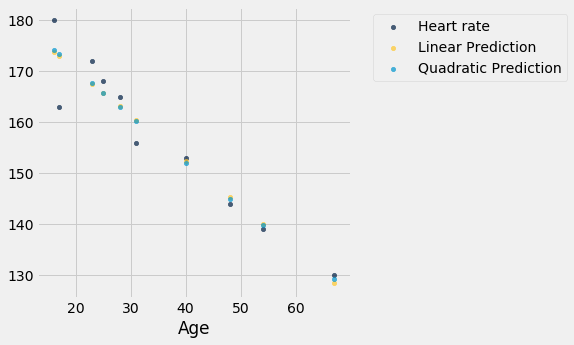

In [18]:
table.scatter(0)

In [19]:
def cubic_regression(x, y):
  """
  Returning R^2, coefficients and the interceptions as a size three tupple.
  """
  return polynomial_regression(x, y, 3)

In [20]:
r_sq, coefficients, interception = cubic_regression(x, y)
print('R^2: ', r_sq)
print('coefficients: ', coefficients)
print('intersection: ', interception)

R^2:  0.9176935349348047
coefficients:  [ 0.06396439 -0.02754737  0.00023652]
intersection:  178.3463040785259


In [21]:
prediction_function = \
  lambda age: sum( [coefficients[i] * age**(i + 1) for i in range(len(coefficients))] ) + interception
prediction_function

<function __main__.<lambda>(age)>

In [22]:
table = table.with_column(
    'Cubic prediction', prediction_function(table.column(0))
)
table

Age,Heart rate,Linear Prediction,Quadratic Prediction,Cubic prediction
16,180,173.763,174.221,173.286
17,163,172.876,173.261,172.635
23,172,167.555,167.568,168.123
25,168,165.781,165.695,166.424
28,165,163.12,162.908,163.732
31,156,160.459,160.149,160.902
40,153,152.477,152.039,151.967
48,144,145.381,145.039,144.105
54,139,140.06,139.918,138.716
67,130,128.529,129.203,130.109


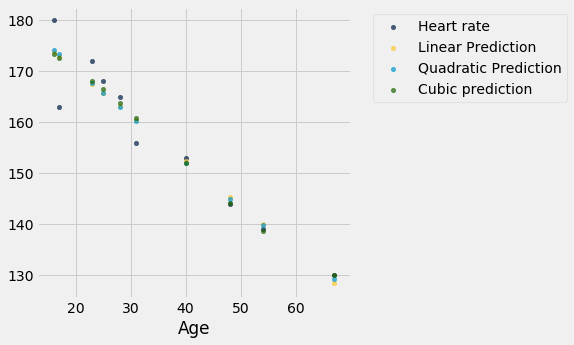

In [23]:
table.scatter(0)

In [24]:
def top_polynomial_regressions(x, y, max_degree, top = 10):
  """
  Print out the best polynomial regressions with the highest Q^2 in a sorted list 
  
  Parameters
  ----------
  x: np.array, regressors
  y: np.array, predictors
  max_degree: int, the degree of the model function
  top: int, number of rows printed from the sorted regressions
  

  Examples
  --------
  >>> x = np.array([16, 17, 23, 25, 28, 31, 40, 48, 54, 67]).reshape((-1, 1))
  >>> y = np.array([180, 163, 172, 168, 165, 156, 153, 144, 139, 130])
  >>> x
  array([[16],
         [17],
         [23],
         [25],
         [28],
         [31],
         [40],
         [48],
         [54],
         [67]])
  >>> y
  array([180, 163, 172, 168, 165, 156, 153, 144, 139, 130])
  >>> top_polynomial_regressions(x, y, 20)
  the top 10 polynomial regressions are
  0.9920 Q^2 with degree 7
  0.9838 Q^2 with degree 8
  0.9741 Q^2 with degree 9
  0.9333 Q^2 with degree 18
  0.9332 Q^2 with degree 17
  0.9330 Q^2 with degree 19
  0.9330 Q^2 with degree 15
  0.9327 Q^2 with degree 16
  0.9326 Q^2 with degree 14
  0.9319 Q^2 with degree 13
  >>> top_polynomial_regressions(x, y, 20, 3)
  the top 3 polynomial regressions are
  0.9920 Q^2 with degree 7
  0.9838 Q^2 with degree 8
  0.9741 Q^2 with degree 9
  >>> 
  """
  sorted_polynomial_regressions = lambda x,y, max_degree: sorted([(polynomial_regression(x,y,i)[0], i) for i in range(2, max_degree)], reverse = True)

  print('the top %d polynomial regressions are' %top)
  for regression in sorted_polynomial_regressions(x, y, max_degree)[:top]:
    print('%.4f Q^2 with degree %d' %(regression[0], regression[1]))


In [25]:
top_polynomial_regressions(x, y, 100, 5)

the top 5 polynomial regressions are
0.9920 Q^2 with degree 7
0.9838 Q^2 with degree 8
0.9741 Q^2 with degree 9
0.9333 Q^2 with degree 18
0.9332 Q^2 with degree 17


In [26]:
top_polynomial_regressions(x, y, 100)

the top 10 polynomial regressions are
0.9920 Q^2 with degree 7
0.9838 Q^2 with degree 8
0.9741 Q^2 with degree 9
0.9333 Q^2 with degree 18
0.9332 Q^2 with degree 17
0.9330 Q^2 with degree 19
0.9330 Q^2 with degree 15
0.9327 Q^2 with degree 16
0.9326 Q^2 with degree 14
0.9325 Q^2 with degree 20


In [27]:
table

Age,Heart rate,Linear Prediction,Quadratic Prediction,Cubic prediction
16,180,173.763,174.221,173.286
17,163,172.876,173.261,172.635
23,172,167.555,167.568,168.123
25,168,165.781,165.695,166.424
28,165,163.12,162.908,163.732
31,156,160.459,160.149,160.902
40,153,152.477,152.039,151.967
48,144,145.381,145.039,144.105
54,139,140.06,139.918,138.716
67,130,128.529,129.203,130.109


In [28]:
help(polynomial_regression)

Help on function polynomial_regression in module __main__:

polynomial_regression(x, y, degree_my=1)
    Return R^2, coefficients and the interception
    
    polynomial_regression(x, y, degree_my = 1) -> (r_sq, coefficients, interception)
    
    Parameters
    ----------
    x: np.array, regressors
    y: np.array, predictors
    degree: int, optional, default 1, the degree of the model function
    
    Examples
    --------
    >>> x = np.array([16, 17, 23, 25, 28, 31, 40, 48, 54, 67]).reshape((-1, 1))
    >>> y = np.array([180, 163, 172, 168, 165, 156, 153, 144, 139, 130])
    
    >>> x
    array([[16],
           [17],
           [23],
           [25],
           [28],
           [31],
           [40],
           [48],
           [54],
           [67]])
    >>> y
    array([180, 163, 172, 168, 165, 156, 153, 144, 139, 130])
    >>> polynomial_regression(x, y)
    (0.9141779810921304, array([-0.88693692]), 187.95409848808737)
    >>> polynomial_regression(x, y, 2)
    (0.914760

In [29]:
r_sq, coefficients, interception = polynomial_regression(x, y, 7)
print('R^2: ', r_sq)
print('coefficients: ', coefficients)
print('intersection: ', interception)

R^2:  0.9919836302596928
coefficients:  [-2.42845826e+03  2.20156310e+02 -1.06683101e+01  2.98918696e-01
 -4.85321170e-03  4.23650865e-05 -1.53677377e-07]
intersection:  11201.430979730576


In [30]:
prediction_function = \
  lambda age: sum( [coefficients[i] * age**(i + 1) for i in range(len(coefficients))] ) + interception
prediction_function

<function __main__.<lambda>(age)>

In [31]:
table = table.with_column(
    '7th degree Prediction', prediction_function(table.column(0))
)
table

Age,Heart rate,Linear Prediction,Quadratic Prediction,Cubic prediction,7th degree Prediction
16,180,173.763,174.221,173.286,179.206
17,163,172.876,173.261,172.635,164.059
23,172,167.555,167.568,168.123,169.331
25,168,165.781,165.695,166.424,170.86
28,165,163.12,162.908,163.732,164.781
31,156,160.459,160.149,160.902,155.28
40,153,152.477,152.039,151.967,153.229
48,144,145.381,145.039,144.105,143.916
54,139,140.06,139.918,138.716,139.102
67,130,128.529,129.203,130.109,130.236


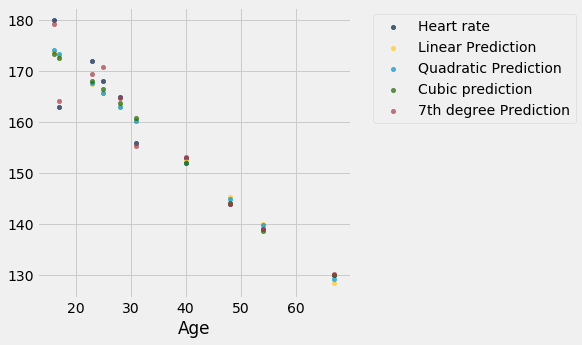

In [32]:
table.scatter(0)